<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.878 · Trabajo fin de Máster · PEC3</p>
<p style="margin: 0; text-align:right;">2023-2 · Máster universitario en Ciencia de datos</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Fase 1. Proceso de extracción, transformación y análisis exploratorio de datos.

Este notebook está dividido en las siguientes partes:

 1. Introduccióm
 2. Carga de datos
 3. Transformación del tipo de datos
 4. Agregación de datos
 5. Procesamiento de valores nulos
 6. Identificación de función de distribución y valores atípicos
 7. Creación de dataframe de estudio
 8. Conclusiones

# 1. Introducción

En el presente notebook se desarrolla la primera fase de la PEC 3 del trabajo de fin de máster titulado: **Técnicas de aprendizaje automático aplicadas en la predicción de potenciales compradores en un e-commerce de productos empresariales en Colombia**.
En la sección 2, se realiza el cargue de los seis dataframe, posteriomente en la sección 3, se verifica y transforma el tipo de variable/atributo, teniendo en cuenta la información suministrada por el director del trabajo de fin de máster y un análisis de detallado de cada dataframe. En la sección 4, sobre los dataframe sesiones y consumos se aplica una operación de agregación/agrupación de datos usando como clave el atributo id_usuario. Dicha operación se puede considerar como una tarea de ingeniería de características, dado que se crearon nuevos atributos. En la sección 5, se realiza un estudio y procesamiento de valores nulos, aplicando diferentes técnicas de imputación en función del tipo de variable/atributo.
En la sección 6 se realiza un estudio basado en estadística descriptiva, gráficos de barras y cajas, para determinar las caracteristicas más relevantes de cada atributo/variable de los seis dataframe. Así mismo, con base en los gráficos se identifican la presencia de valores atípicos.
En la sección 7 se concatena los dataframe, para conformar el conjunto de datos final, que se usará para la generación de los modelos predictivos.
Finalmente, en la sección 8 se presenta las conclusiones más relevantes del estudio realizado en el presente notebook.


Se cargan las librerias necesarias para desarrollar el estudio

In [53]:
import pandas as pd
import numpy as np
import etl_process as etl    
from joblib import Parallel, delayed
import seaborn as sns
import matplotlib.pyplot as plt

# 2. Carga de datos

 Se cargan los seis dataframes cuyo formato es txt. Ya que contienen carácteres especiales es necesario usar condificación **ISO-8859-1**

In [2]:
consumos_df = pd.read_csv('data/Linea1-Consumos.txt', sep=';', encoding = "ISO-8859-1")
empresas_df = pd.read_csv('data/Linea1-Empresas_Consultadas.txt', sep=';', encoding = "ISO-8859-1")
primer_consumo_df = pd.read_csv('data/Linea1-Primer_Consumo.txt', sep=';', encoding = "ISO-8859-1")
sesiones_df = pd.read_csv('data/Linea1-Sesiones.txt', sep=';', encoding = "ISO-8859-1")
usuarios_df = pd.read_csv('data/Linea1-Usuarios.txt', sep=';', encoding = "ISO-8859-1")
ventas_df = pd.read_csv('data/Linea1-Ventas.txt', sep=';', encoding = "ISO-8859-1")

In [19]:
estimacion_vol = pd.DataFrame([consumos_df.shape,
                               empresas_df.shape,
                               primer_consumo_df.shape,
                               sesiones_df.shape,
                               usuarios_df.shape,
                               ventas_df.shape], columns=['filas', 'columnas'], 
                               index=['consumos', 'empresas', 'primer consumo', 'sesiones', 'usuarios', 'ventas'])

estimacion_vol['total datos'] = estimacion_vol['filas']*estimacion_vol['columnas']
estimacion_vol = pd.concat([estimacion_vol, pd.DataFrame(estimacion_vol.sum(axis=0)).T])
estimacion_vol = estimacion_vol.rename(index={0: 'total'})
estimacion_vol

,filas,columnas,total datos
consumos,571498,11,6286478
empresas,206032,6,1236192
primer consumo,142709,11,1569799
sesiones,182054,3,546162
usuarios,142736,8,1141888
ventas,2669,11,29359
total,1247698,50,10809878


# 3. Verificación del tipo de datos

Con el proposito de normalizar los nombres de los atributos de cada dataframe a minúsculas, se crea la función change_names_colos, para renombrar el nombre de las columnas. 

In [3]:
consumos_df, empresas_df, \
    primer_consumo_df, sesiones_df, \
        usuarios_df, ventas_df = etl.change_names_cols(consumos_df, empresas_df, 
                                                       primer_consumo_df, sesiones_df, 
                                                       usuarios_df, ventas_df)

Se realiza un conteo general del tipo datos en cada dataframe, mediante la función value_counts

In [4]:
value_counts_df = etl.value_counts(consumos_df, empresas_df, primer_consumo_df, sesiones_df, usuarios_df, ventas_df)
value_counts_df.head(10)

,consumos,empresas,primer_consumo,sesiones,usuarios,ventas
int64,2.0,2.0,2.0,1.0,2,2
float64,0.0,0.0,0.0,0.0,1,4
object,9.0,4.0,9.0,2.0,5,5


Se realiza un descripción detallada del tipo de datos de cada columna en los dataframe, mediante la función dtypes_feat

In [5]:
dtypes_feat_df = etl.dtypes_feat(consumos_df, empresas_df, primer_consumo_df, sesiones_df, usuarios_df, ventas_df)
dtypes_feat_df

,consumos,empresas,primer_consumo,sesiones,usuarios,ventas
idconsumo,object,0,object,0,0,0
idusuario,object,0,object,object,object,object
idproducto,object,0,object,0,0,0
descproducto,object,0,object,0,0,0
fechaconsumo,object,0,object,0,0,0
empconsul_id,object,object,object,0,0,0
empconsul_sector,object,object,object,0,0,0
empconsul_descsector,object,object,object,0,0,0
empconsul_prov_desc,object,object,object,0,0,0
numconsumos,int64,int64,int64,0,0,0


<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> Se observan 3 tipo de datos en los dataframes (int64, float64 y object). En menor proporción float64 y en mayor proporción de tipo object.
</div>

## 3.1. Transformación del tipo de dato en cada columna de los dataframe

A través de la función normalize_df, se transforma el tipo de datos en cada dataframe. Lo anterior, se realiza gracias a la información sumistrada por el docente director del TFM y una revisión detallada de cada atributo de los dataframe. 

In [6]:
consumos_df, empresas_df, \
    primer_consumo_df, sesiones_df, \
        usuarios_df, ventas_df = etl.normalize_df(consumos_df, empresas_df, 
                                                  primer_consumo_df, sesiones_df, 
                                                  usuarios_df, ventas_df)

In [7]:
value_counts_df_norm = etl.value_counts(consumos_df, empresas_df, primer_consumo_df, sesiones_df, usuarios_df, ventas_df)
value_counts_df_norm

,consumos,empresas,primer_consumo,sesiones,usuarios,ventas
int64,2.0,2.0,2.0,1.0,0.0,0.0
datetime64[ns],1.0,0.0,1.0,1.0,2.0,1.0
int32,0.0,0.0,0.0,0.0,0.0,1.0
float64,0.0,0.0,0.0,0.0,0.0,6.0
object,8.0,4.0,8.0,1.0,6.0,3.0


In [8]:
dtypes_feat_df_norm = etl.dtypes_feat(consumos_df, empresas_df, primer_consumo_df, sesiones_df, usuarios_df, ventas_df)
dtypes_feat_df_norm

,consumos,empresas,primer_consumo,sesiones,usuarios,ventas
idconsumo,object,0,object,0,0,0
idusuario,object,0,object,object,object,object
idproducto,object,0,object,0,0,0
descproducto,object,0,object,0,0,0
fechaconsumo,datetime64[ns],0,datetime64[ns],0,0,0
empconsul_id,object,object,object,0,0,0
empconsul_sector,object,object,object,0,0,0
empconsul_descsector,object,object,object,0,0,0
empconsul_prov_desc,object,object,object,0,0,0
numconsumos,int64,int64,int64,0,0,0


# 1.3. Agregación de datos

### 1.3.1. Agregación de datos en dataframe sesiones_df 

El dataframe sesiones_df es necesario agregar/agrupar la información asociada a cada usuario. Como se aprecia el tamaño en filas de todo el dataframe es diferente del número de usurios y este puede ocasionar inconvenientes al momento de concatenar los dataframes a través del índice **usuariosid** (el valor de usuariosid debe ser único).

In [9]:
len(sesiones_df['idusuario'].unique())

142736

In [10]:
len(sesiones_df['idusuario'])

182054

El dataframe original, tiene la siguiente estructura

In [11]:
sesiones_df.head(5)

,idusuario,fecha_sesion,sesiones
0,686884100,2018-01-01,12
1,686884400,2018-01-01,4
2,686885000,2018-01-01,4
3,686885900,2018-01-01,3
4,686885900,2018-07-09,1


Para extraer la información, se aplicar la función info_sesiones y se paraleliza para optimizar el tiempo de ejecución.

In [12]:
sesiones_group = list(sesiones_df.groupby('idusuario'))

sesiones_dict = Parallel(n_jobs=4)(
    delayed(etl.info_sesiones)(item_group)
       for item_group in sesiones_group)

sesiones_df2 = pd.concat([pd.DataFrame(item).T for item in sesiones_dict])
sesiones_df2.index.names = ['idusuario']

In [13]:
cols_to_int = ['dias_max_entre_sesion', 'dias_min_entre_sesion', 
               'fechas_total_sesion', 'total_sesiones']

sesiones_df2[cols_to_int] = sesiones_df2.loc[:, cols_to_int].astype('int')

sesiones_df2['fecha_inicio_sesion'] = pd.to_datetime(sesiones_df2['fecha_inicio_sesion'], format='%Y/%m/%d %H:%M:%S')
sesiones_df2['fecha_fin_sesion'] = pd.to_datetime(sesiones_df2['fecha_fin_sesion'], format='%Y/%m/%d %H:%M:%S')

In [14]:
sesiones_df2.head(5)

,dias_max_entre_sesion,dias_min_entre_sesion,fecha_fin_sesion,fecha_inicio_sesion,fechas_total_sesion,total_sesiones
idusuario,,,,,,
686884100,0,0,2018-01-01,2018-01-01,1,12
686884400,0,0,2018-01-01,2018-01-01,1,4
686885000,0,0,2018-01-01,2018-01-01,1,4
686885900,189,189,2018-07-09,2018-01-01,2,4
686887000,0,0,2018-01-01,2018-01-01,1,10


<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> Luego de aplicar la operación de agregación, se obtienen otros atributos que se describen a continuación:
    
- <strong>días_max_entre_sesion/días_min_entre_sesion:</strong>  Dado que un usuario con el mismo ID ha realizado múltiples visitas en fechas distintas, es interesante saber cuántos días (máximo y mínimo) han pasado entre dichas fechas. 
    
- <strong>fechas_total_sesion:</strong> cuenta el número de fechas en las que un usuario con el mismo ID, realizó una sesión, entre la primera y ultima fecha.
    
- <strong>total_sesiones:</strong> cuenta el número de sesiones que un usuario con el mismo ID, ha realizado entre la primera y última fecha.

</div>

### 1.3.2. Agregación de datos en dataframe consumos_df

La estructura original del dataframe consumos_df es:

In [15]:
consumos_df.head(5)

,idconsumo,idusuario,idproducto,descproducto,fechaconsumo,empconsul_id,empconsul_sector,empconsul_descsector,empconsul_prov_desc,numconsumos,numusuarios
0,4686314000,746282300,14491700,Ficha Básica,2018-11-13,29273500,C,Industria Manufacturera,Cundinamarca,9,8
1,4605734800,739803100,14492000,Perfil Promocional,2018-10-03,29273500,C,Industria Manufacturera,Cundinamarca,9,8
2,4341821000,716273300,14492000,Perfil Promocional,2018-05-28,29273500,C,Industria Manufacturera,Cundinamarca,9,8
3,4525804700,732314600,14492000,Perfil Promocional,2018-08-23,29273500,C,Industria Manufacturera,Cundinamarca,9,8
4,5326634200,805692700,14491700,Ficha Básica,2019-10-10,29273500,C,Industria Manufacturera,Cundinamarca,9,8


De igual manera que en el dataframe anterior, sobre el  dataframe  consumos_df es necesario agregar/agrupar la información asociada a cada usuario. Como se aprecia el tamaño en filas de todo el dataframe es diferente del número de usurios y este puede ocasionar inconvenientes al momento de concatenar los dataframes a través del índice **usuariosid** (el valor de usuariosid debe ser único).

In [16]:
len(consumos_df['idusuario'].unique())

142709

In [17]:
len(consumos_df['idusuario'])

571498

Se procede a agregar/agrupar la información. Donde se aplican dos funciones: most_common y most_common_count

In [18]:
consumos_df3 = consumos_df.groupby('idusuario').agg({
        'fechaconsumo': ['min', 'max'],
        'descproducto': [etl.most_common, etl.most_common_count],   
        'empconsul_id': [etl.most_common, etl.most_common_count],
        'empconsul_sector': [etl.most_common, etl.most_common_count],
        'empconsul_prov_desc': [etl.most_common, etl.most_common_count],   
        'numconsumos': 'sum',
        'numusuarios': 'sum'
    }).reset_index()

consumos_df3.columns = [
    'idusuario', 
    'fecha_primera_consulta', 
    'fecha_ultima_consulta',    
    'descproducto_mas_freq', 
    'descproducto_mas_freq_total',    
    'empconsul_id_mas_freq',
    'empconsul_id_mas_freq_total',    
    'empconsul_sector_mas_freq',
    'empconsul_sector_mas_freq_total',    
    'empconsul_prov_desc_mas_freq',
    'empconsul_prov_desc_mas_freq_total',    
    'total_consumos', 
    'total_usuarios'
]

consumos_df3.set_index('idusuario', inplace=True)

En términos generales, se determina cuales son las clases mas frecuentes en variables categorícas y el número total de de consumos asociados a cada variable y cliente.

In [19]:
consumos_df3.head(5)

,fecha_primera_consulta,fecha_ultima_consulta,descproducto_mas_freq,descproducto_mas_freq_total,empconsul_id_mas_freq,empconsul_id_mas_freq_total,empconsul_sector_mas_freq,empconsul_sector_mas_freq_total,empconsul_prov_desc_mas_freq,empconsul_prov_desc_mas_freq_total,total_consumos,total_usuarios
idusuario,,,,,,,,,,,,
686884100,2018-01-01,2018-01-01,Ficha Básica,2,39389476800,4,P,4.0,Bogota,2.0,35,23
686884400,2018-01-01,2018-01-01,Perfil Promocional,1,2107915296700,1,G,1.0,Bogota,1.0,13,4
686885000,2018-01-01,2018-01-01,Perfil Promocional,1,393993000,1,E,1.0,Santander,1.0,1,1
686885900,2018-01-01,2018-07-09,Ficha Básica,2,32553459800,1,N,1.0,Santander,1.0,10,8
686887000,2018-01-01,2018-01-01,Ficha Básica,2,38277950700,2,M,1.0,Bogota,1.0,100,47


<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> Luego de aplicar la operación de agregación, se obtienen otros atributos que se describen a continuación:

- <strong>fecha_primera_consulta:</strong> hace referencia a la fecha en la que un usuario con el mismo id hace la primera consulta	
- <strong>fecha_ultima_consulta:</strong> hace referencia a la fecha en la que un usuario con el mismo id hace la última consulta 	
- <strong>descproducto_mas_freq:</strong> producto más frecuente que ha consumido un usuario	
- <strong>descproducto_mas_freq_total:</strong> conteo del producto más frecuente que ha consumido un usuario
- <strong>empconsul_id_mas_freq:</strong> conteo del id de la empresa.
- <strong>empconsul_id_mas_freq_total:</strong> conteo total del id de la empresa 	
- <strong>empconsul_sector_mas_freq:</strong> sector más frecuente asociado al consumo realizado por el usuario
- <strong>empconsul_sector_mas_freq_total:</strong> conteo del sector mas frecuente asociado al consumo realizado por el usuario.
- <strong>empconsul_prov_desc_mas_freq:</strong> ciudad mas frecuente asociada al consumo realizado por el usuario.
- <strong>empconsul_prov_desc_mas_freq_total:</strong> conteo de la ciudad mas frecuente asociado al consumo realizado por el usuario
- <strong>total_consumos:</strong> total de consumos realizados por el usuario

- <strong>total_usuarios:</strong> total de usuarios que hicieron consumos asociado al mismo id_usuario  

</div>

# 2. Procesamiento valores Nulos

En esta sección se identifican los valores nulos a través de un conteo general en cada dataframe

## 2.1. Identificación de valores Nulos

In [20]:
usuarios_df.set_index('idusuario', inplace=True)
ventas_df.set_index('idusuario', inplace=True)
primer_consumo_df.set_index('idusuario', inplace=True)
empresas_df.set_index('empconsul_id', inplace=True)

In [21]:
null_counts_df = etl.null_value_counts(consumos_df3, empresas_df, primer_consumo_df, sesiones_df2, usuarios_df, ventas_df)

In [22]:
null_counts_total = pd.DataFrame(null_counts_df.sum(axis=0), columns=['total_null'])
null_counts_total

,total_null
consumos,456.0
empresas,4381.0
primer_consumo,1066.0
sesiones,0.0
usuarios,253076.0
ventas,7863.0


Como se puede apreciar, en todos los dataframes a excepción de sesiones, no presenta valores nulos.

A continuación, se detallará para cada dataframe la presencia de valores nulos

### 2.1.1. Dataframe consumos

In [23]:
consumos_df3 = consumos_df3.fillna(value=np.nan)
consumos_df3 = consumos_df3.replace(to_replace="^nan$", value=np.nan, regex=True)

In [24]:
pct_consumos_null = pd.concat([100*consumos_df3.isnull().mean(), consumos_df3.dtypes], axis=1)
pct_consumos_null.columns = ['pct', 'type']
pct_consumos_null

,pct,type
fecha_primera_consulta,0.000000,datetime64[ns]
fecha_ultima_consulta,0.000000,datetime64[ns]
descproducto_mas_freq,0.000000,object
descproducto_mas_freq_total,0.000000,int64
empconsul_id_mas_freq,0.000000,object
empconsul_id_mas_freq_total,0.000000,int64
empconsul_sector_mas_freq,0.079883,object
empconsul_sector_mas_freq_total,0.079883,float64
empconsul_prov_desc_mas_freq,0.079883,object
empconsul_prov_desc_mas_freq_total,0.079883,float64


### 2.1.2. Dataframe empresas

In [25]:
empresas_df = empresas_df.fillna(value=np.nan)
empresas_df = empresas_df.replace(to_replace="^nan$", value=np.nan, regex=True)

In [26]:
pct_empresas_null = pd.concat([100*empresas_df.isnull().mean(), empresas_df.dtypes], axis=1)
pct_empresas_null.columns = ['pct', 'type']
pct_empresas_null

,pct,type
empconsul_sector,0.709113,object
empconsul_descsector,0.709113,object
empconsul_prov_desc,0.708142,object
numconsumos,0.000000,int64
numusuarios,0.000000,int64


### 2.1.3. Dataframe primer consumo

In [27]:
primer_consumo_df = primer_consumo_df.fillna(value=np.nan)
primer_consumo_df = primer_consumo_df.replace(to_replace="^nan$", value=np.nan, regex=True)

In [28]:
pct_primer_consumo_nan = pd.concat([100*primer_consumo_df.isna().mean(), primer_consumo_df.dtypes], axis=1)
pct_primer_consumo_nan.columns = ['pct', 'type']
pct_primer_consumo_nan

,pct,type
idconsumo,0.000000,object
idproducto,0.000000,object
descproducto,0.000000,object
fechaconsumo,0.000000,datetime64[ns]
empconsul_id,0.000000,object
empconsul_sector,0.249459,object
empconsul_descsector,0.249459,object
empconsul_prov_desc,0.248057,object
numconsumos,0.000000,int64
numusuarios,0.000000,int64


In [29]:
pct_primer_consumo_null = pd.concat([100*primer_consumo_df.isnull().mean(), primer_consumo_df.dtypes], axis=1)
pct_primer_consumo_null.columns = ['pct', 'type']
pct_primer_consumo_null

,pct,type
idconsumo,0.000000,object
idproducto,0.000000,object
descproducto,0.000000,object
fechaconsumo,0.000000,datetime64[ns]
empconsul_id,0.000000,object
empconsul_sector,0.249459,object
empconsul_descsector,0.249459,object
empconsul_prov_desc,0.248057,object
numconsumos,0.000000,int64
numusuarios,0.000000,int64


### 2.1.4. Dataframe sesiones

In [30]:
pct_sesiones_null = pd.concat([100*sesiones_df2.isnull().mean(), sesiones_df2.dtypes], axis=1)
pct_sesiones_null.columns = ['pct', 'type']
pct_sesiones_null

,pct,type
dias_max_entre_sesion,0.0,int32
dias_min_entre_sesion,0.0,int32
fecha_fin_sesion,0.0,datetime64[ns]
fecha_inicio_sesion,0.0,datetime64[ns]
fechas_total_sesion,0.0,int32
total_sesiones,0.0,int32


### 2.1.5. Dataframe usuarios

In [31]:
pct_usuarios_nan = pd.concat([100*usuarios_df.isna().mean(), usuarios_df.dtypes], axis=1)
pct_usuarios_nan.columns = ['pct', 'type']
pct_usuarios_nan

,pct,type
tipousuario,0.000000,object
fec_registro,0.000000,datetime64[ns]
canal_registro,2.466792,object
ind_cliente,0.000000,object
bondad_email,0.000000,object
usu_tipo,76.664612,object
fec_cliente,98.172150,datetime64[ns]


In [32]:
pct_usuarios_null = pd.concat([100*usuarios_df.isnull().mean(), usuarios_df.dtypes], axis=1)
pct_usuarios_null.columns = ['pct', 'type']
pct_usuarios_null

,pct,type
tipousuario,0.000000,object
fec_registro,0.000000,datetime64[ns]
canal_registro,2.466792,object
ind_cliente,0.000000,object
bondad_email,0.000000,object
usu_tipo,76.664612,object
fec_cliente,98.172150,datetime64[ns]


### 2.1.6. Dataframe ventas

In [33]:
pct_ventas_nan = pd.concat([100*ventas_df.isna().mean(), ventas_df.dtypes], axis=1)
pct_ventas_nan.columns = ['pct', 'type']
pct_ventas_nan

,pct,type
idventa,0.000000,object
fechaventa,0.000000,datetime64[ns]
tipoventa,0.000000,object
importe,0.000000,float64
numventas,0.000000,int32
importes,0.000000,float64
vp_informe,10.041214,float64
bono,92.019483,float64
suscripcion,96.365680,float64
vp_listado,96.178344,float64


In [34]:
pct_ventas_null = pd.concat([100*ventas_df.isnull().mean(), ventas_df.dtypes], axis=1)
pct_ventas_null.columns = ['pct', 'type']
pct_ventas_null

,pct,type
idventa,0.000000,object
fechaventa,0.000000,datetime64[ns]
tipoventa,0.000000,object
importe,0.000000,float64
numventas,0.000000,int32
importes,0.000000,float64
vp_informe,10.041214,float64
bono,92.019483,float64
suscripcion,96.365680,float64
vp_listado,96.178344,float64


<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> En términos generales se observa que la presencia de valores nulos es menor al 1% en los dataframe, consumos, empresas y primer consumo. En el dataframe sesiones, no presenta valores nulos. Por el contrario los dataframes usuarios y ventas, tienen algunos atributos con un  porcentaje alto de valores nulos (> 90%).     

</div>

## 2.2. Imputación de valores nulos

Con la información anterior y considerando la descripción de los variables de los dataframes facilitada por el director del trabajo de fin de máster, se precede aplicar distintas estrategias de manipulación/Imputación de datos para cada dataframe.

### 2.2.1. Dataframe consumos

Para el dataframe **consumo_df** se procederaá a realizar imputación de valores nulos. Ya que su porcentaje es relativamente bajo (menor al 5%), una forma es hacerlo a través modelos de machine learning, particularmente se usará random forest para variables numéricas y la para las variables categóricas se usuará un método estadistico, es decir, la moda de clase de cada columna.

In [35]:
consumos_df3_inpute = etl.impute_num_pred(consumos_df3, etl.extract_cols_impute(consumos_df3, mode='num'), n_estimators=10)
consumos_df3_inpute = etl.cols_impute(consumos_df3_inpute, etl.extract_cols_impute(consumos_df3_inpute, mode='cat'))

In [36]:
pct_consumo_null = pd.concat([100*consumos_df3_inpute.isnull().mean(), consumos_df3_inpute.dtypes], axis=1)
pct_consumo_null.columns = ['pct', 'type']
pct_consumo_null

,pct,type
fecha_primera_consulta,0.0,datetime64[ns]
fecha_ultima_consulta,0.0,datetime64[ns]
descproducto_mas_freq,0.0,object
descproducto_mas_freq_total,0.0,int64
empconsul_id_mas_freq,0.0,object
empconsul_id_mas_freq_total,0.0,int64
empconsul_sector_mas_freq,0.0,object
empconsul_sector_mas_freq_total,0.0,float64
empconsul_prov_desc_mas_freq,0.0,object
empconsul_prov_desc_mas_freq_total,0.0,float64


### 2.2.2. Dataframe empresas

Para el dataframe **empresas_df** se procederaá a realizar imputación de valores nulos. Ya que su porcentaje es relativamente bajo (menor al 5%), se usará el procedimiento descrito anteriormente

In [37]:
empresas_df_impute = etl.cols_impute(empresas_df, etl.extract_cols_impute(empresas_df, mode='cat'))

In [38]:
pct_empresas_null = pd.concat([100*empresas_df_impute.isnull().mean(), empresas_df_impute.dtypes], axis=1)
pct_empresas_null.columns = ['pct', 'type']
pct_empresas_null

,pct,type
empconsul_sector,0.0,object
empconsul_descsector,0.0,object
empconsul_prov_desc,0.0,object
numconsumos,0.0,int64
numusuarios,0.0,int64


### 2.2.3. Dataframe primer consumo

Para el dataframe **primer_consumo_df** se procederaá a realizar imputación de valores nulos. Ya que su porcentaje es relativamente bajo (menor al 5%), se usará el procedimiento descrito anteriormente

In [39]:
primer_consumo_df_impute = etl.cols_impute(primer_consumo_df, etl.extract_cols_impute(primer_consumo_df, mode='cat')) 

In [40]:
pct_primer_consumo_null = pd.concat([100*primer_consumo_df_impute.isnull().mean(), primer_consumo_df_impute.dtypes], axis=1)
pct_primer_consumo_null.columns = ['pct', 'type']
pct_primer_consumo_null

,pct,type
idconsumo,0.0,object
idproducto,0.0,object
descproducto,0.0,object
fechaconsumo,0.0,datetime64[ns]
empconsul_id,0.0,object
empconsul_sector,0.0,object
empconsul_descsector,0.0,object
empconsul_prov_desc,0.0,object
numconsumos,0.0,int64
numusuarios,0.0,int64


### 2.2.4. Dataframe usuarios

Para el dataframe **usuarios_df** se observa que la columna **usu_tipo** tiene un 76.66 % de valores nulos, dado que esta información es equivalente a **tipousuario**, se eliminará del dataframe.

In [41]:
usuarios_df.drop('usu_tipo', axis=1, inplace=True)

La columna **fec_cliente** tiene 98.2 % de valores nulos. Esto se relaciona con la fecha en que un usuario se convierte en cliente. Los valores nulos de esta columna son útiles y se deben mantener. Una forma de extraer información de esta columna, es calculando la diferencia en días entre la fecha de registro de usuario y las filas donde se presentó una conversión en cliente. 
Dado que esta operación generará valores nulos, estos reemplazaran con -1.

In [42]:
usuarios_df['days_reg_cli'] = (usuarios_df['fec_cliente'] - usuarios_df['fec_registro']).dt.days.fillna(-1)

Finalmente, la columna **canal_registro** tiene un 2.46 % de valores nulos. Se aplicará una técnica de inputación de datos basada en un modelo de machine learning, particularmente random forest.

In [44]:
usuarios_df_impute = etl.cols_impute(usuarios_df, etl.extract_cols_impute(usuarios_df, mode='cat')) 

In [45]:
pct_usuarios_null = pd.concat([100*usuarios_df_impute.isnull().mean(), usuarios_df_impute.dtypes], axis=1)
pct_usuarios_null.columns = ['pct', 'type']
pct_usuarios_null

,pct,type
tipousuario,0.00000,object
fec_registro,0.00000,datetime64[ns]
canal_registro,0.00000,float64
ind_cliente,0.00000,object
bondad_email,0.00000,object
fec_cliente,98.17215,datetime64[ns]
days_reg_cli,0.00000,float64


### 2.2.5. Dataframe ventas

Finalmente, el dataframe ventas_df tiene valores nulos en las siguiente columnas: 'vp_informe', 'vp_listado', 'bono', 'suscripcion'.
Ahora bien, esta información está presente en la columna tipoventa. Por ende, en esta etapa del análisis se puede prescindir de ellas.

In [46]:
ventas_df.drop(['vp_informe', 'vp_listado', 'bono', 'suscripcion'], axis=1, inplace=True)

In [47]:
pct_ventas_null = pd.concat([100*ventas_df.isnull().mean(), ventas_df.dtypes], axis=1)
pct_ventas_null.columns = ['pct', 'type']
pct_ventas_null

,pct,type
idventa,0.0,object
fechaventa,0.0,datetime64[ns]
tipoventa,0.0,object
importe,0.0,float64
numventas,0.0,int32
importes,0.0,float64


# 3. Identificación de función de distribución y valores atípicos

En esta sección se identificarán los valores atípicos en cada dataframe, mediante inspección visual de un gráfico de cajas y su distribución. Se resalta que en esta sección, no se implementará ningúna técnica para tratar dichos valores. Se evaluará y decidirá si es conveniente eliminar dichos valores en la fase posterior, donde se concatenen todos las dataframes. 
El objetivo preliminar es visualizar como es la forma de la distribución de los atributos de cada dataframe e identificación de valores atípicos.

## 3.1. Dataframe consumo promocional

In [48]:
consumos_df3_inpute.select_dtypes(include=['int', 'float']).describe(include='all').fillna(0).T

,count,mean,std,min,25%,50%,75%,max
descproducto_mas_freq_total,142709.0,1.650134,0.476929,1.0,1.0,2.0,2.0,2.0
empconsul_id_mas_freq_total,142709.0,2.528012,12.564938,1.0,1.0,1.0,2.0,3141.0
empconsul_sector_mas_freq_total,142709.0,1.750292,1.343619,1.0,1.0,1.0,2.0,21.0
empconsul_prov_desc_mas_freq_total,142709.0,1.502454,1.110345,1.0,1.0,1.0,2.0,28.0
total_consumos,142709.0,50.187290,231.533352,1.0,4.0,12.0,38.0,60066.0
total_usuarios,142709.0,29.747360,136.777393,1.0,3.0,7.0,21.0,37393.0


In [118]:
cols_to_int = ['empconsul_sector_mas_freq_total', 'empconsul_prov_desc_mas_freq_total']
consumos_df3_inpute[cols_to_int] = consumos_df3_inpute.loc[:, cols_to_int].astype('int')

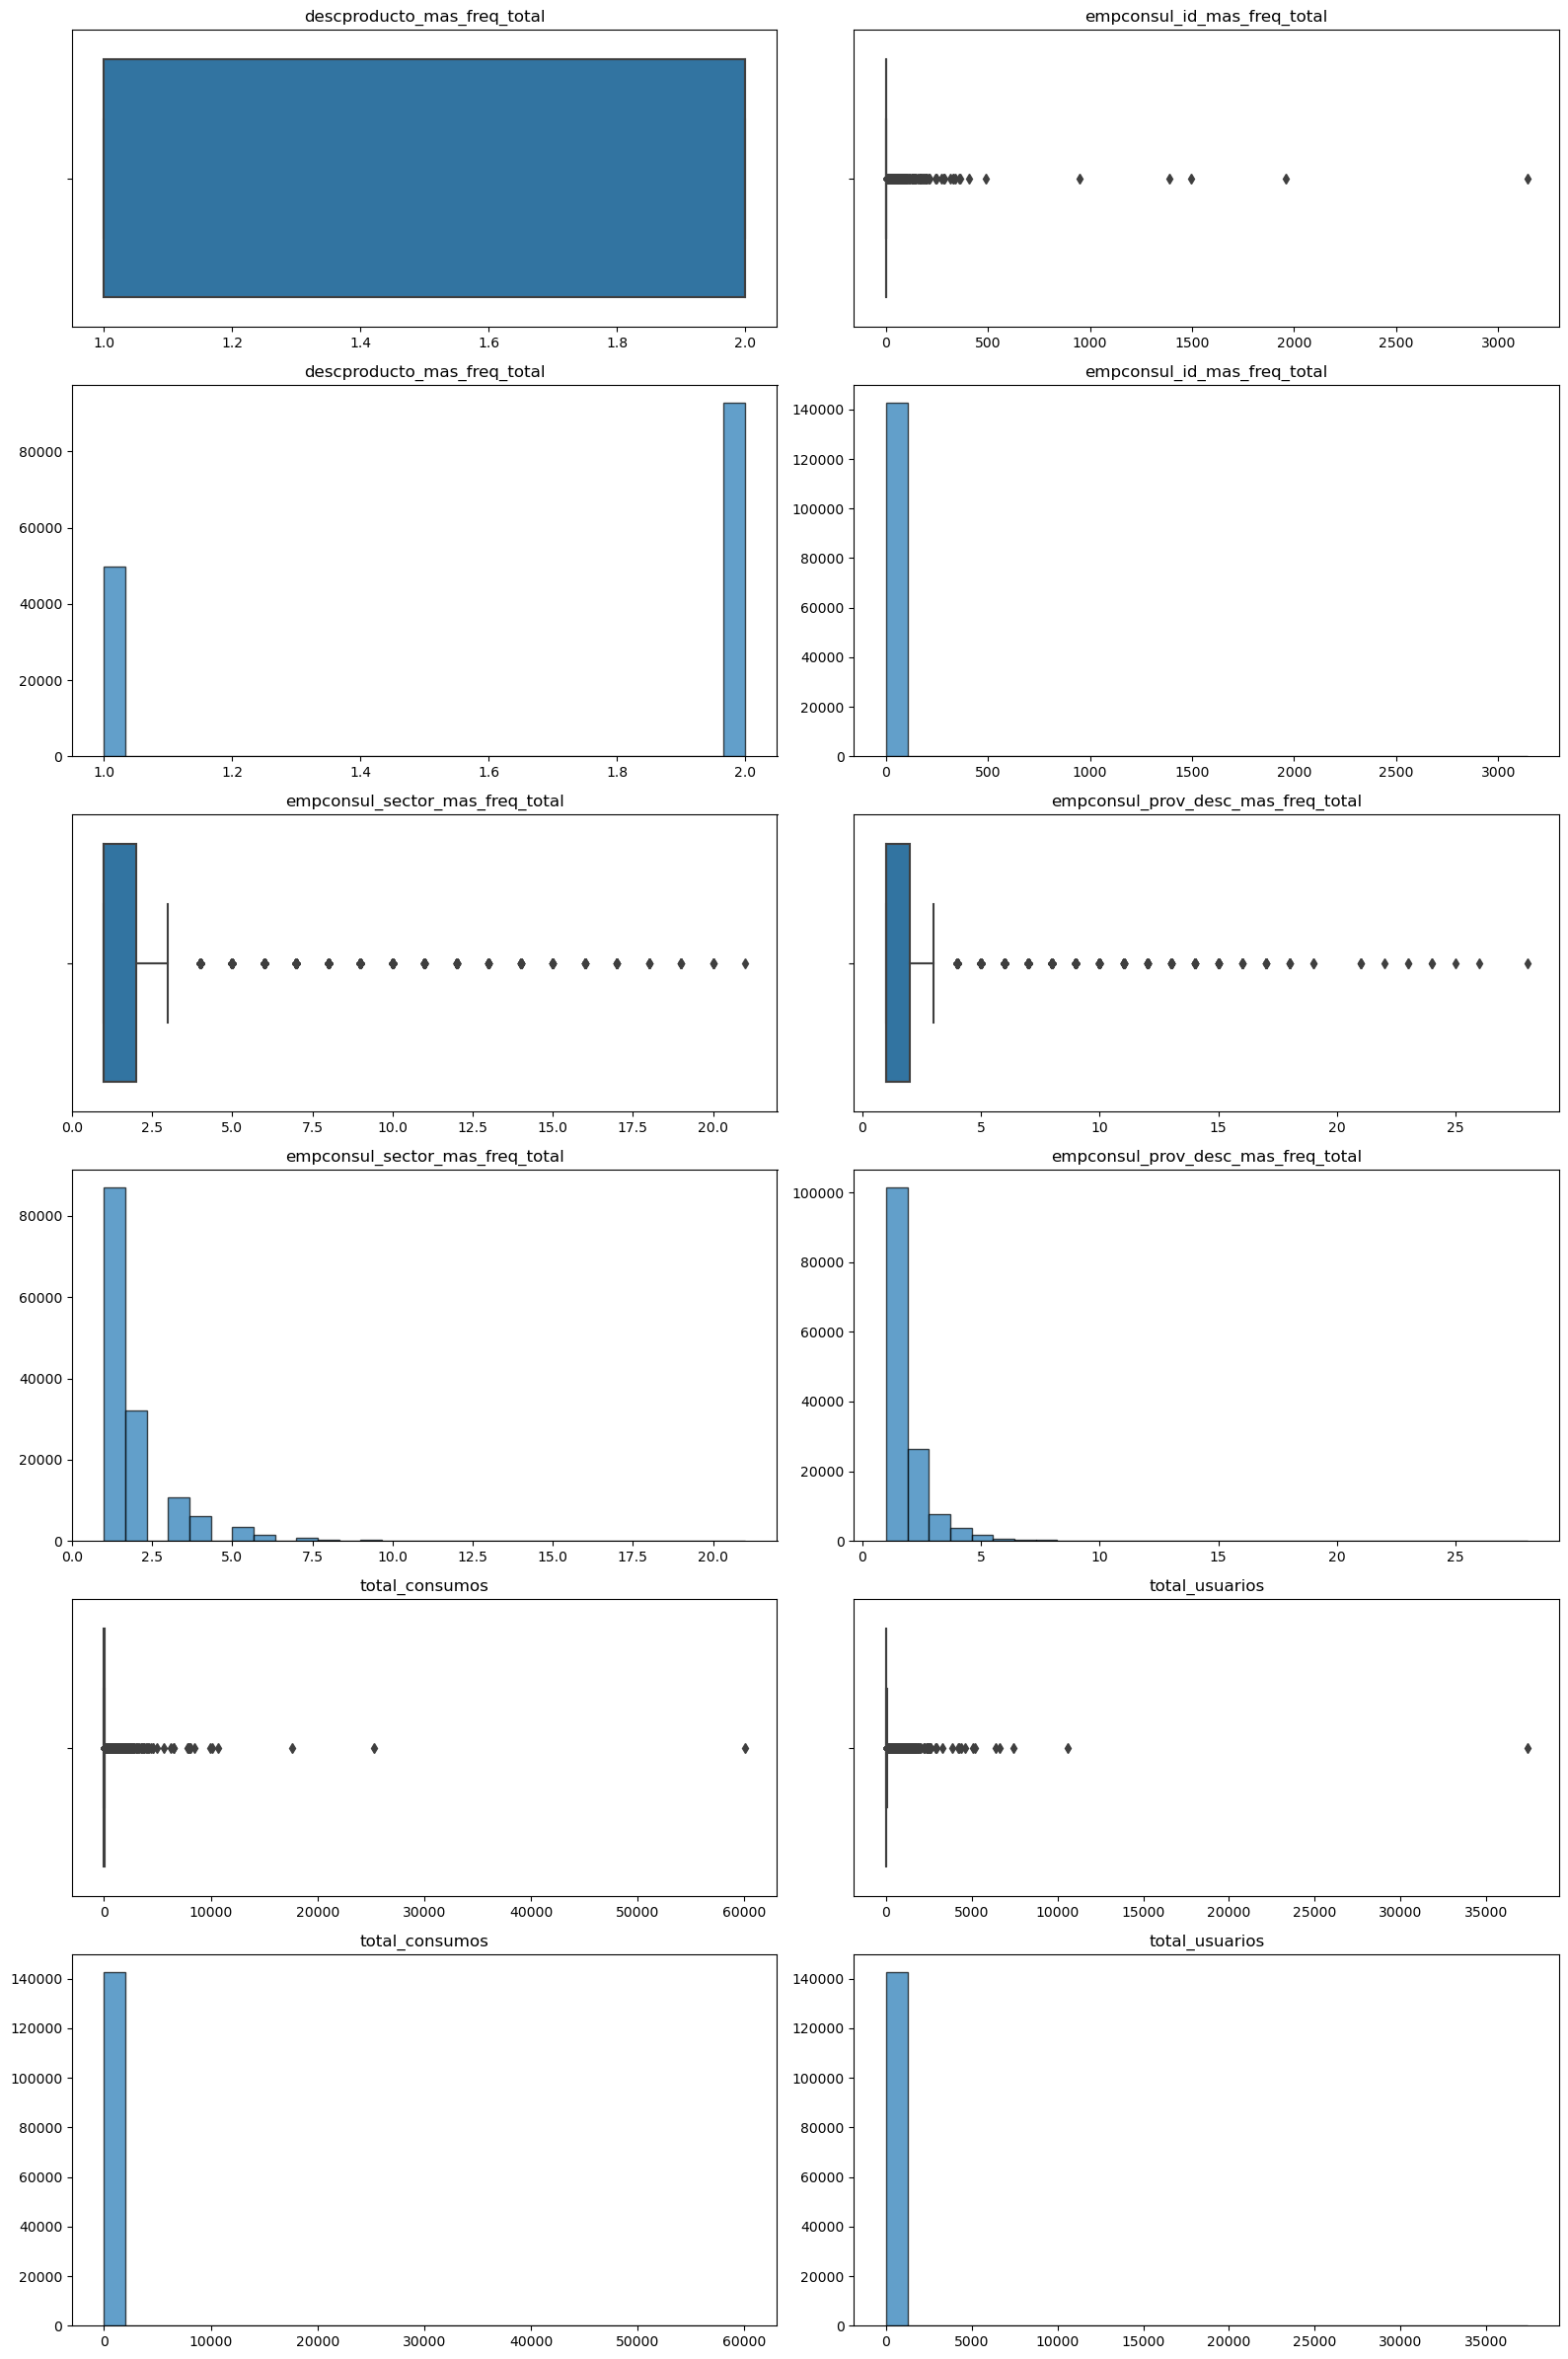

In [119]:
etl.plot_boxplot_and_hist(consumos_df3_inpute.select_dtypes(include=['int']))

In [49]:
consumos_df3_inpute.select_dtypes(include=['object']).describe(include='all').fillna(0).T

,count,unique,top,freq
descproducto_mas_freq,142709,2,Ficha Básica,77676
empconsul_id_mas_freq,142709,93641,49749200,186
empconsul_sector_mas_freq,142709,22,G,36768
empconsul_prov_desc_mas_freq,142709,34,Bogota,60676


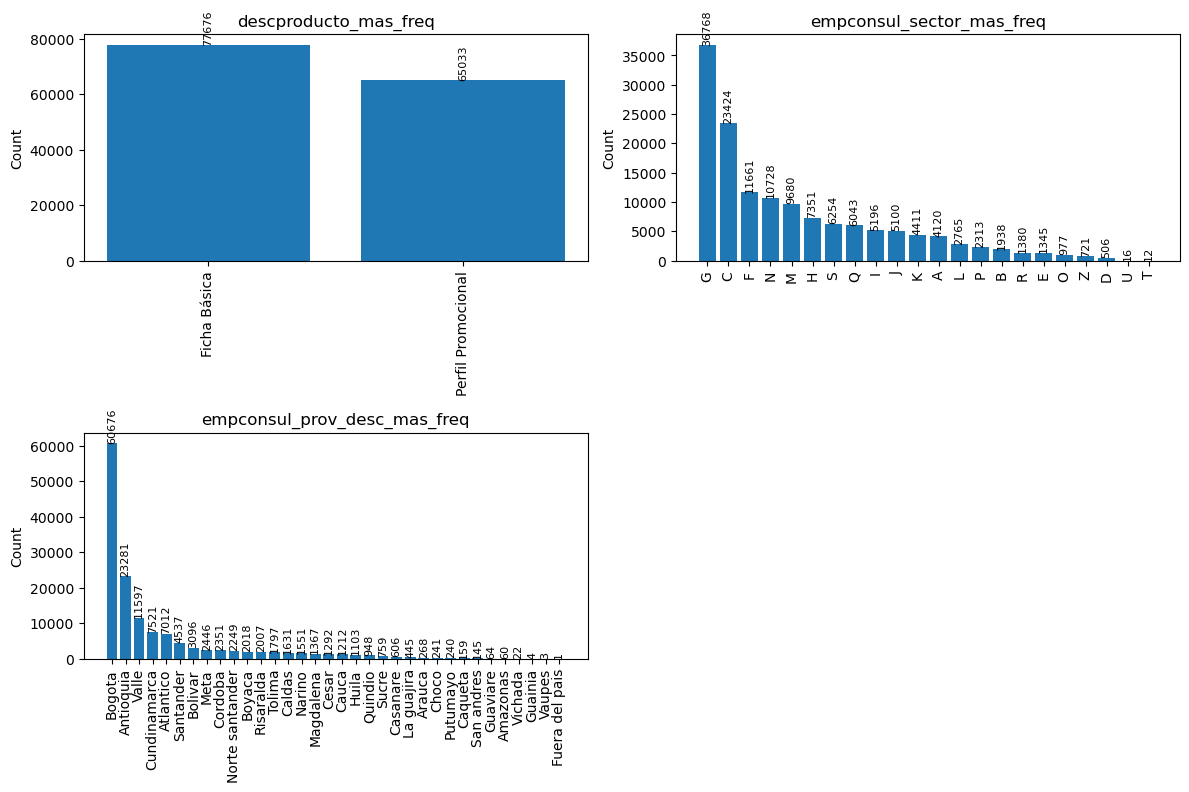

In [120]:
etl.plot_categorical_bars(consumos_df3_inpute.select_dtypes(include=['object']).drop('empconsul_id_mas_freq', axis=1))

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> En las variables numéricas del dataframe consumos se observa lo siguiente:

En el atributo <strong>descproducto_mas_freq_total</strong> no se aprecian valores atípicos.
En los atributos <strong>empconsul_id_mas_freq_total, empconsul_sector_mas_freq_total, Empconsul_prov_desc_mas_freq_total, total_consumos y total_usuarios</strong>, se aprecia una distribución con un sesgo a la derecha y la presencia de valores atípicos.
    
Por otro lado, una posible aproximación al comportamiento descrito en las figuras anteriores se resumen a continuación:

En primer lugar, en la variable <strong>descproducto_mas_freq_total</strong>, se aprecia que un usuario tiende a consumir dos productos, de dicho conteo, el producto mas frecuentemente consumido es <strong>Ficha Básica</strong>. 
Por otro lado, el número de sectores promedio que han realizado consumos y que está asociado al atributo <strong>empconsul_sector_mas_freq_total</strong>, se ubica alrededor de 2.5 y de dicho número, los sectores más frecuentes son <strong>G, C y F</strong>. 
    
Respecto al origen geográfico de las empresas que realizaron consumos y que está asociado a al atributo <strong>empconsul_prov_desc_mas_freq_total</strong>, se aprecia que este valor se concentra entre 1 y 5. De dicho número las regiones mas frecuentes son: <strong>Bogotá, Antioquia, Valle y Cundinamarca</strong>.

Finalmente, <strong>el número total de consumos y usuarios</strong> no evidencia una distribución clara. La mayoría de los valores está concentrada en torno a 50 y 30, respectivamente. En cuanto a la dispersión y densidad de valores atípicos se encuentra entre cero y diez mil.
</div>

## 3.2. Dataframe empresas

In [50]:
empresas_df_impute.select_dtypes(include=['int', 'float']).describe(include='all').fillna(0).T   

,count,mean,std,min,25%,50%,75%,max
numconsumos,206032.0,2.773831,5.202734,1.0,1.0,2.0,3.0,425.0
numusuarios,206032.0,1.751039,3.148412,1.0,1.0,1.0,2.0,303.0


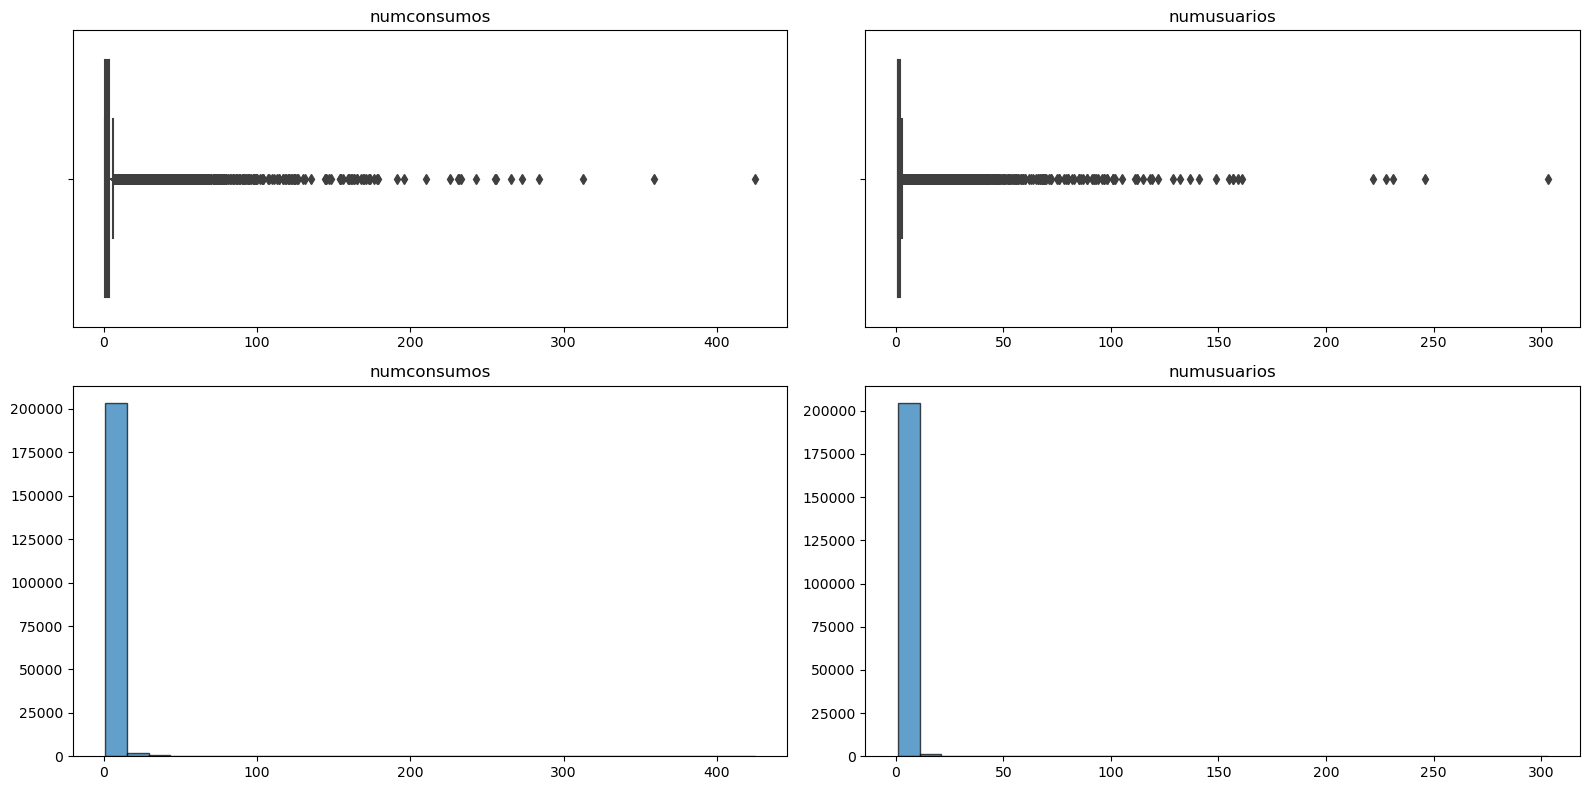

In [56]:
etl.plot_boxplot_and_hist(empresas_df_impute.select_dtypes(include=['int', 'float']))

In [51]:
empresas_df_impute.select_dtypes(include=['object']).describe(include='all').T

,count,unique,top,freq
empconsul_sector,206032,23,G,61907
empconsul_descsector,206032,23,Comercio,61907
empconsul_prov_desc,206032,34,Bogota,79683


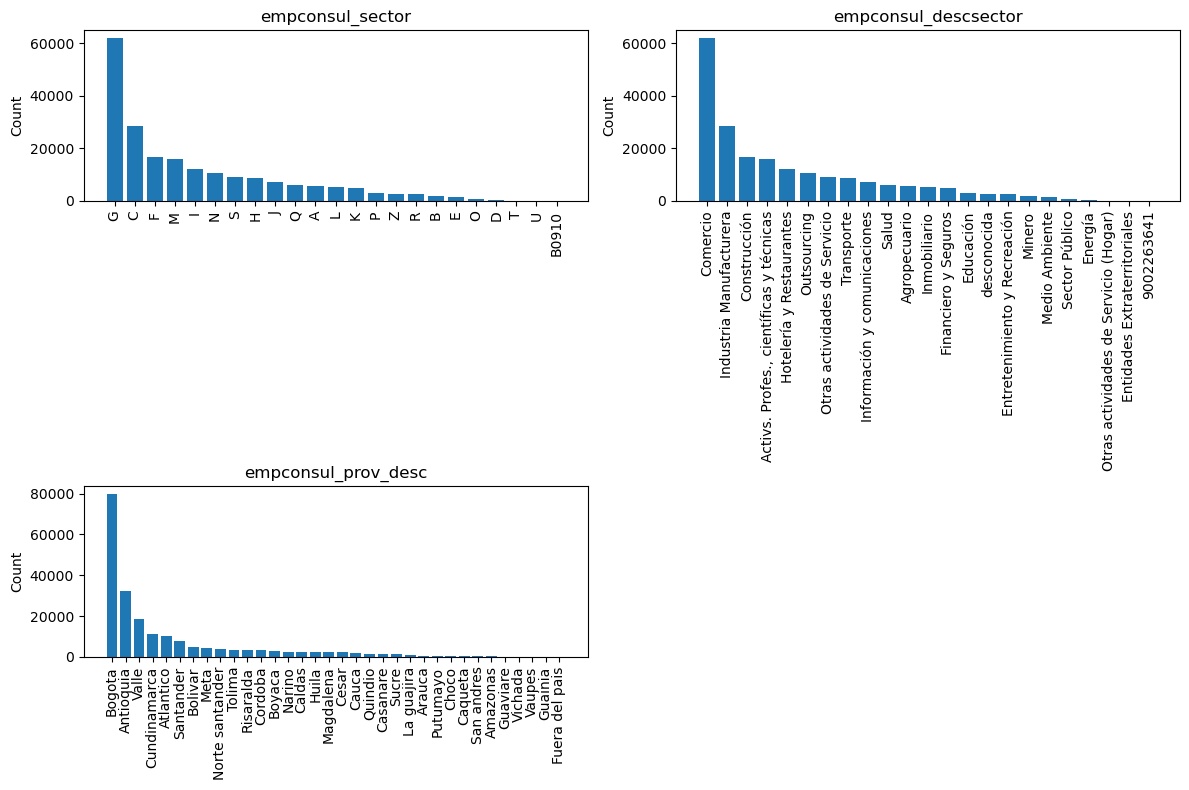

In [58]:
etl.plot_categorical_bars(empresas_df_impute.select_dtypes(include=['object']), False) 

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> En las variables numéricas del dataframe empresas se observa lo siguiente:
En los atributos <strong>numconsumos</strong> y <strong>numusuarios</strong> se aprecia una distribución con un sesgo a la derecha y la presencia de valores atípicos. El numero de consumos y usuarios promedio es de <strong>2.7 y 1.75</strong>, respectivamente.

En la variable categórica <strong>empconsul_sector</strong>, se aprecia los sectores mas frecuentes son <strong>G, C y F</strong> que hacen referencia a los sectores: <strong>comercio, industria manufactorera y construcción.</strong> Finalmente en el atributo <strong>empconsul_prov_desc,</strong> se aprecia que las regiones con mayor frecuencia son <strong>Bogotá, Antioquia, Valle y Cundinamarca.</strong> 
</div>

## 3.3. Dataframe primer consumo

In [52]:
primer_consumo_df_impute.select_dtypes(include=['int', 'float']).describe(include='all').fillna(0).T   

,count,mean,std,min,25%,50%,75%,max
numconsumos,142709.0,12.468751,32.638217,1.0,2.0,4.0,9.0,425.0
numusuarios,142709.0,8.047425,23.181965,1.0,1.0,2.0,5.0,303.0


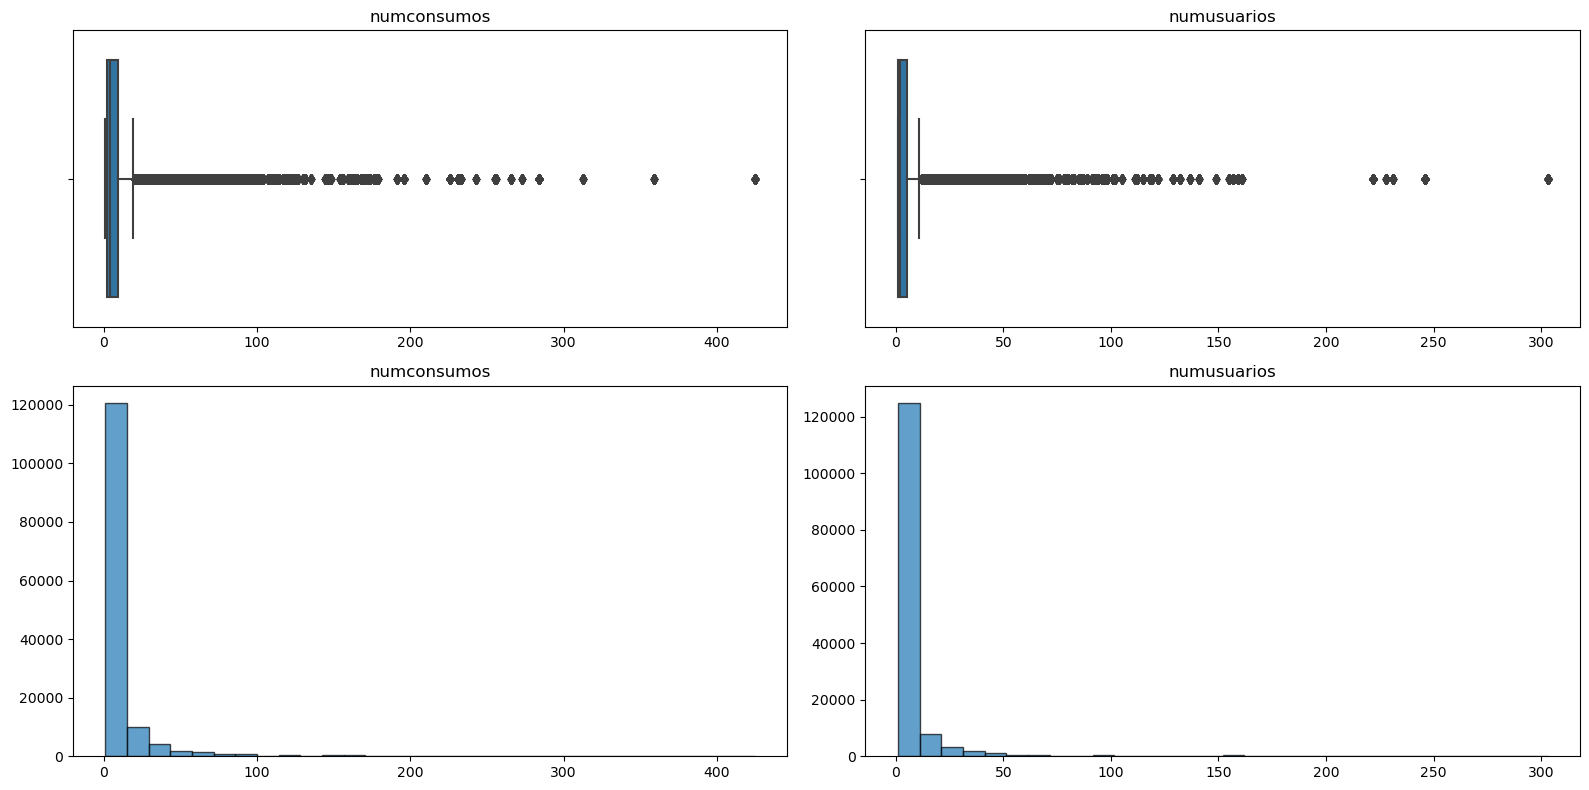

In [60]:
etl.plot_boxplot_and_hist(primer_consumo_df_impute.select_dtypes(include=['int', 'float']))

In [53]:
primer_consumo_df_impute.select_dtypes(include=['object']).describe(include='all').fillna(0).T   

,count,unique,top,freq
idconsumo,142709,142709,4005775800,1
idproducto,142709,2,14492000,103055
descproducto,142709,2,Perfil Promocional,103055
empconsul_id,142709,91768,36864402800,238
empconsul_sector,142709,22,G,33565
empconsul_descsector,142709,22,Comercio,33565
empconsul_prov_desc,142709,34,Bogota,57072


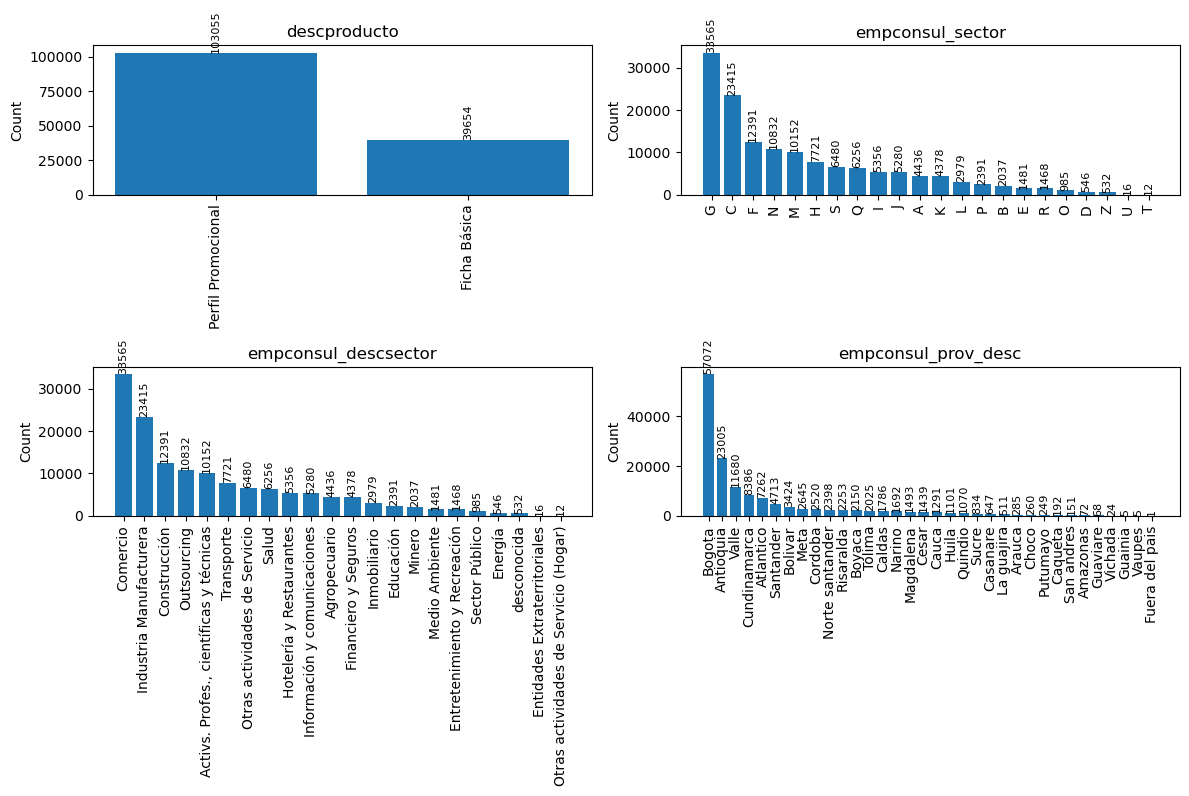

In [61]:
etl.plot_categorical_bars(primer_consumo_df_impute[['descproducto', 'empconsul_sector', 'empconsul_descsector', 'empconsul_prov_desc']]) 

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> En las variables numéricas del dataframe primer consumo se observa lo siguiente:
    
En los atributos <strong>numconsumos</strong>  y numusuarios se aprecia una distribución con un sesgo a la derecha y la presencia de valores atípicos. El número de consumos y numusuarios promedio es de <strong>12.5 y 8.0</strong>, respectivamente.
En las variables categóricas <strong>desc_producto</strong> , se aprecia que en mayor frecuencia el primer consumo se hace sobre el producto <strong>perfil promocional</strong> .
    
Por otro lado, en mayor frecuencia los sectores de las empresas que realizan más primeros consumos son <strong>G, C y F</strong> , que hacen referencia a los sectores <strong>comercio, industria manufacturera y construcción</strong> . Finalmente, en el atributo <strong>empconsul_prov_desc</strong> , se aprecia que las regiones con mayor frecuencia son <strong>Bogotá, Antioquia, Valle y Cundinamarca</strong>  

</div>

## 3.4. Dataframe sesiones

In [54]:
sesiones_df2.select_dtypes(include=['int', 'float']).describe(include='all').fillna(0).T   

,count,mean,std,min,25%,50%,75%,max
dias_max_entre_sesion,142736.0,33.443455,128.113422,0.0,0.0,0.0,0.0,1480.0
dias_min_entre_sesion,142736.0,26.780588,114.121476,0.0,0.0,0.0,0.0,1431.0
fechas_total_sesion,142736.0,1.275460,1.030149,1.0,1.0,1.0,1.0,129.0
total_sesiones,142736.0,8.988980,27.450122,4.0,5.0,5.0,9.0,6346.0


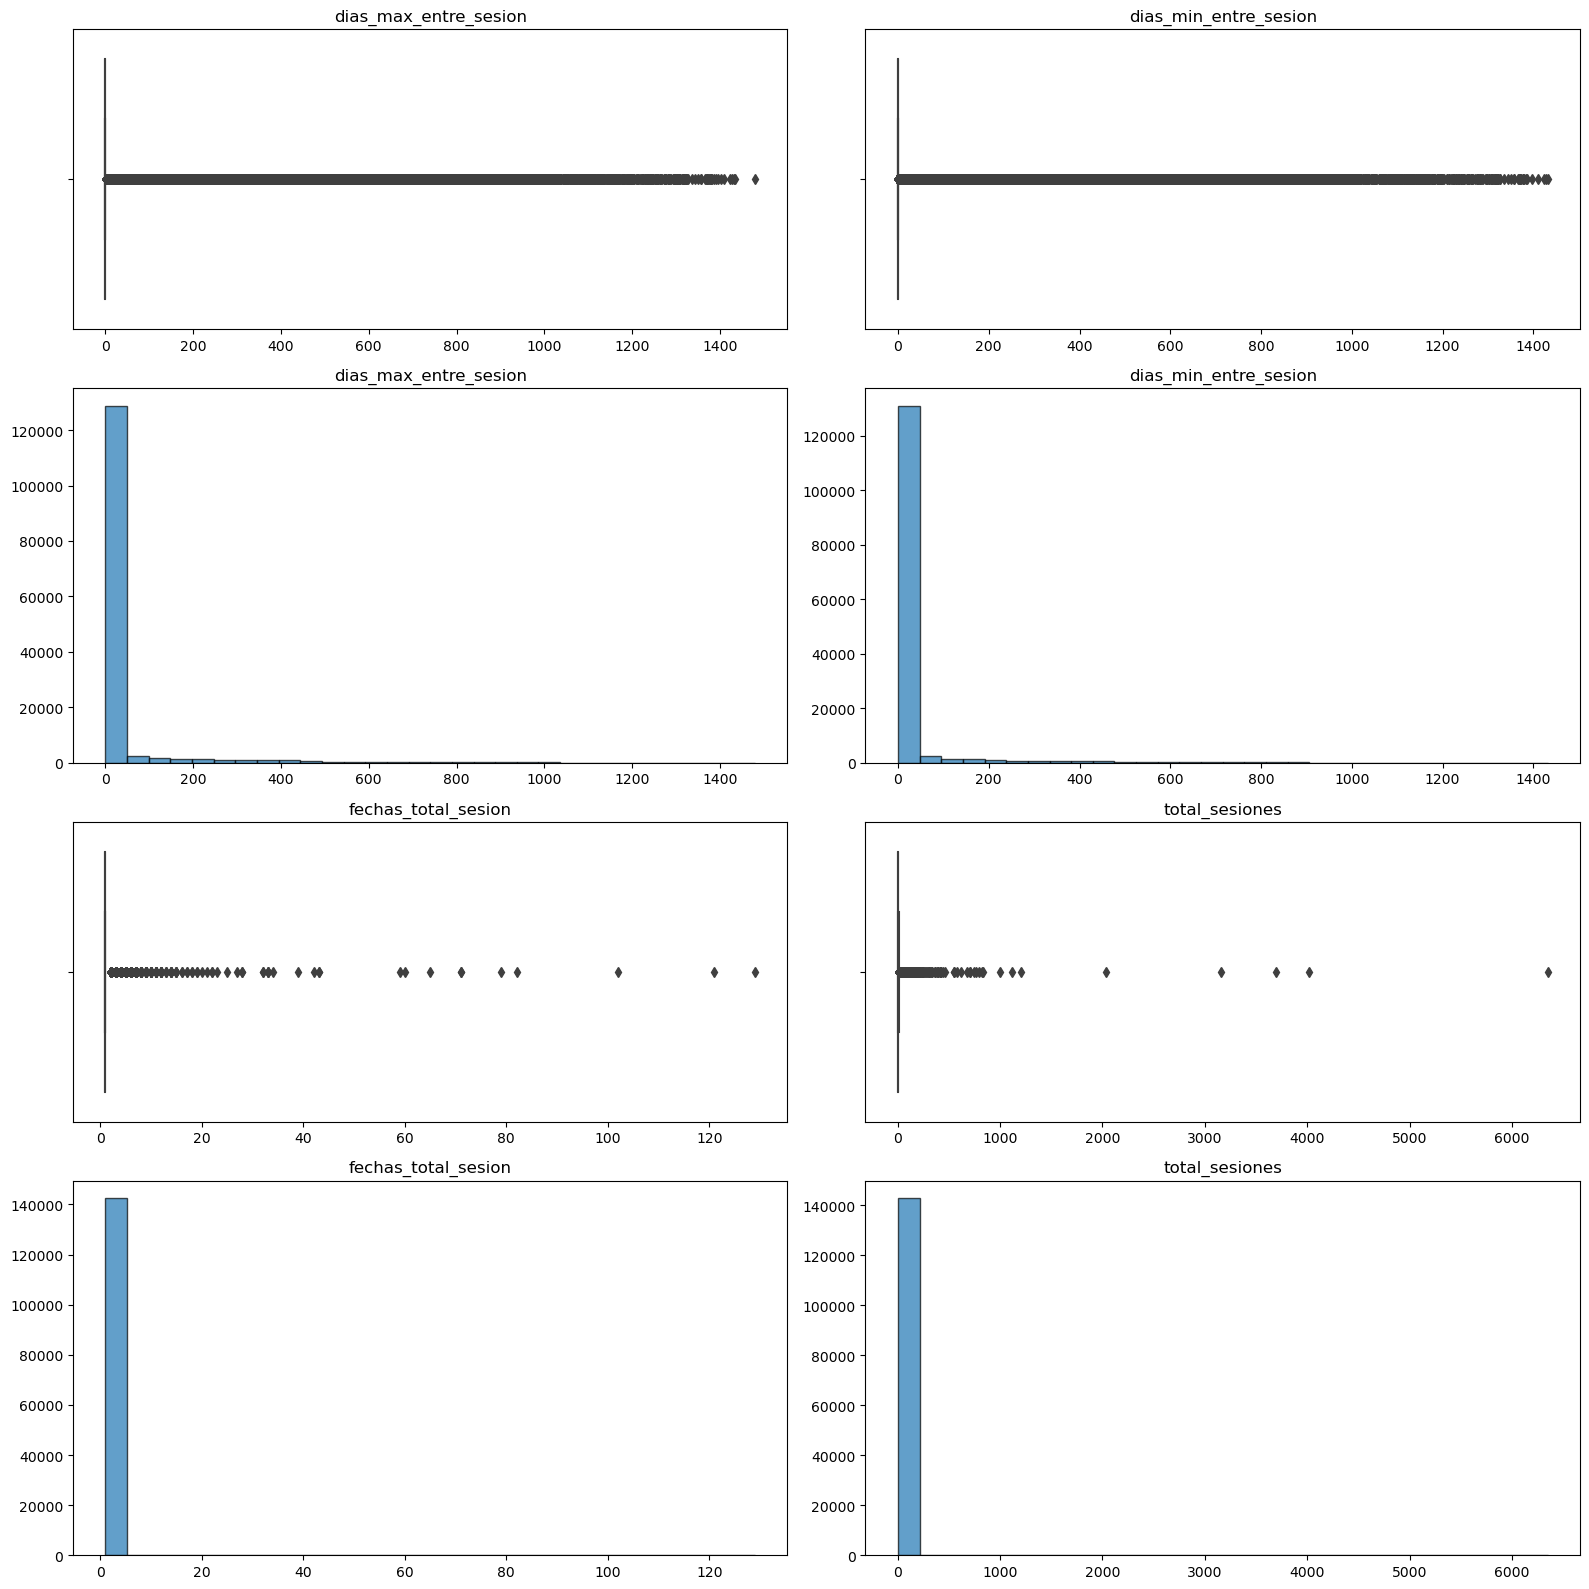

In [55]:
etl.plot_boxplot_and_hist(sesiones_df2.select_dtypes(include=['int', 'float']))

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> En las variables numéricas del dataframe sesiones se observa lo siguiente:
    
En los atributos <strong>dias_max_entre_sesion, dias_min_entre_sesion, fechas_total_sesion y total_sesiones</strong>, se aprecia una distribución con un sesgo a la derecha y la presencia de valores atípicos.
Por otro lado, para un usuario con el mismo id, <strong>el número de días máximo y mínimo promedio</strong> entre cada sesión es <strong>33 y 26</strong> dias respectivamente. Respecto al numero de <strong>fechas promedio</strong> en las que se realiza una sesión es <strong>1.2</strong> y el <strong>número promedio de sesiones</strong> realizadas es de <strong>8.9</strong>. 

</div>

## 3.5. Dataframe usuarios

In [64]:
usuarios_df_impute['canal_registro'] = usuarios_df_impute['canal_registro'].astype('object')

In [65]:
usuarios_df_impute.select_dtypes(include=['int', 'float']).describe(include='all').fillna(0).T  

,count,mean,std,min,25%,50%,75%,max
days_reg_cli,142736.0,0.61873,27.46965,-1.0,-1.0,-1.0,-1.0,1038.0


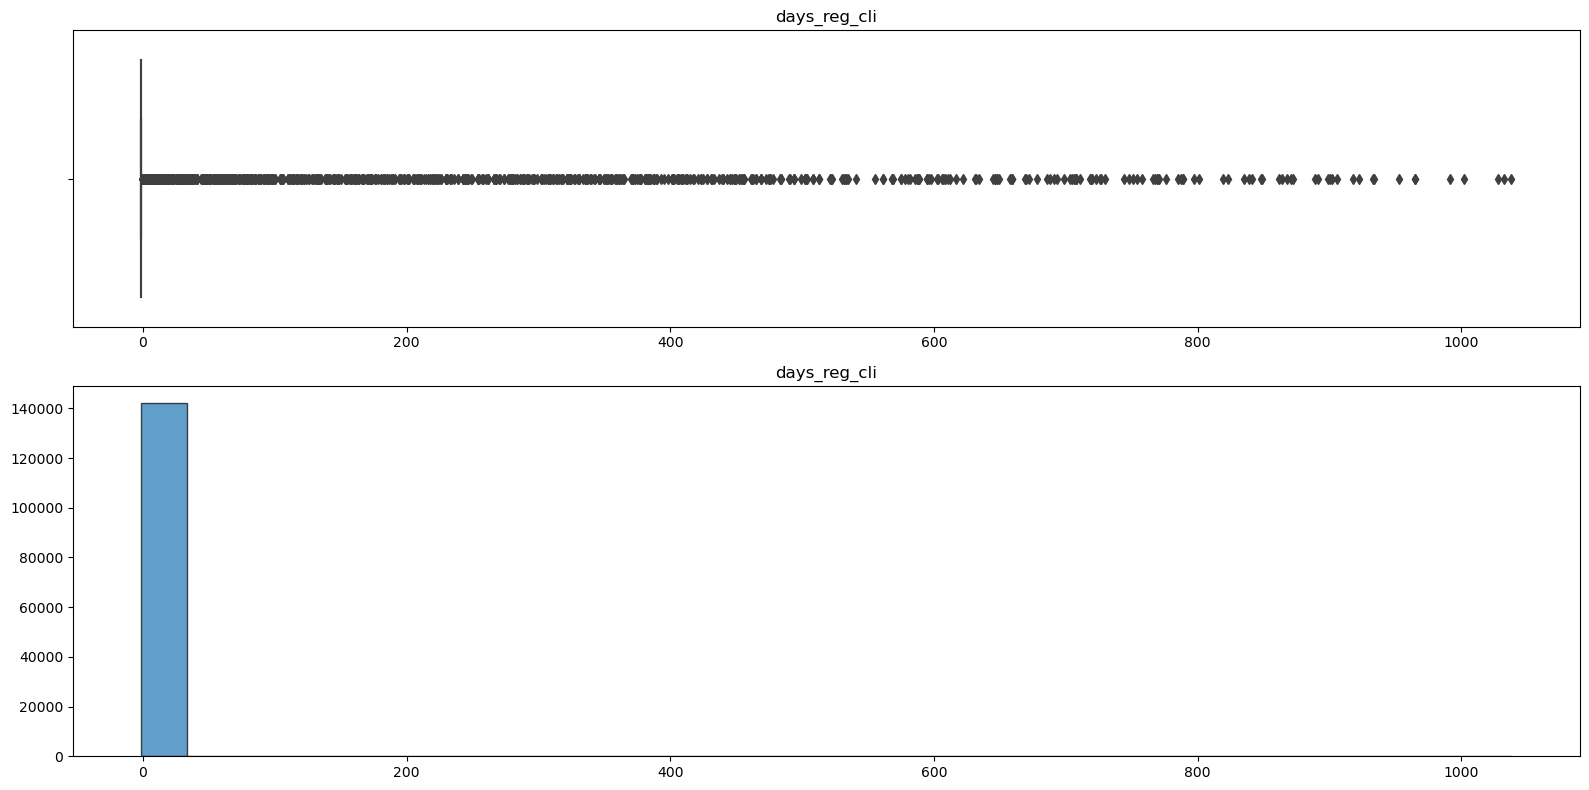

In [66]:
etl.plot_boxplot_and_hist(usuarios_df_impute.select_dtypes(include=['float', 'int']))    

In [67]:
usuarios_df_impute.select_dtypes(include=['object']).describe(include='all').fillna(0).T  

,count,unique,top,freq
tipousuario,142736,3,PF,102160
canal_registro,142736.0,8.0,3.0,41746.0
ind_cliente,142736,2,0,140121
bondad_email,142736,6,20,99024


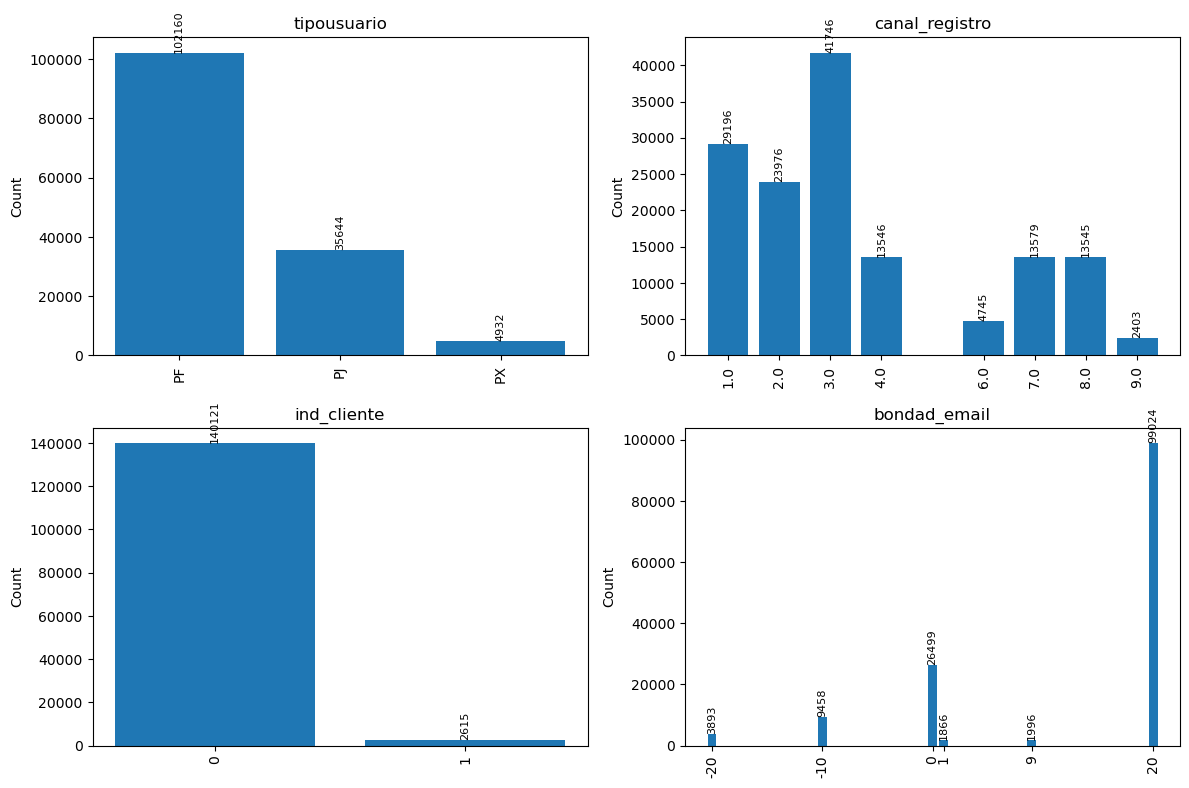

In [68]:
etl.plot_categorical_bars(usuarios_df_impute.select_dtypes(include=['object']), True)

In [69]:
print("Porcentaje se convierte en cliente: ", 100*2615/(2615+140121))
print("Porcentaje no se convierte en cliente: ", 100*140121/(2615+140121))

Porcentaje se convierte en cliente:  1.8320535814370587
Porcentaje no se convierte en cliente:  98.16794641856295


<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> En las variables numéricas del dataframe usuarios se observa lo siguiente:
    
En el atributo <strong>days_reg_cli</strong>  se aprecia una distribución con un sesgo a la derecha y la presencia de valores atípicos.
También se observa que en promedio los días de registro de un cliente es <strong>0.61</strong>  y como máximo <strong>1038</strong>.
    
En cuanto a las variables categóricas, en el atributo <strong>canal_registro</strong> , se aprecia que el canal mas frecuente es <strong>3, 1 y 2</strong> . Respecto al atributo <strong>bondad_email</strong> , se aprecia que el valor mas frecuente es <strong>20 y 0</strong> .
En el atributo <strong>tipousuario</strong>, el valor más frecuente es <strong>PF</strong>  y finalmente la <strong>variable target o ind_cliente</strong>, que hace referencia a los usuarios que se convirtieron en clientes, se aprecia que está altamente desbalaceada. En términos de porcentajes solo <strong>1.83%</strong>  de clientes se convierte en cliente y <strong>98.17%</strong>  no lo hacen.
</div>

## 3.6. Dataframe ventas

In [70]:
ventas_df.select_dtypes(include=['int', 'float']).describe(include='all').fillna(0).T  

,count,mean,std,min,25%,50%,75%,max
importe,2669.0,9.422088e+04,3.405413e+05,721.0,15000.0,35000.0,65000.0,7.068000e+06
numventas,2669.0,2.054702e+00,3.414517e+00,1.0,1.0,1.0,2.0,8.500000e+01
importes,2669.0,2.060685e+07,9.803209e+07,600000.0,2500000.0,4000000.0,10500000.0,2.941047e+09


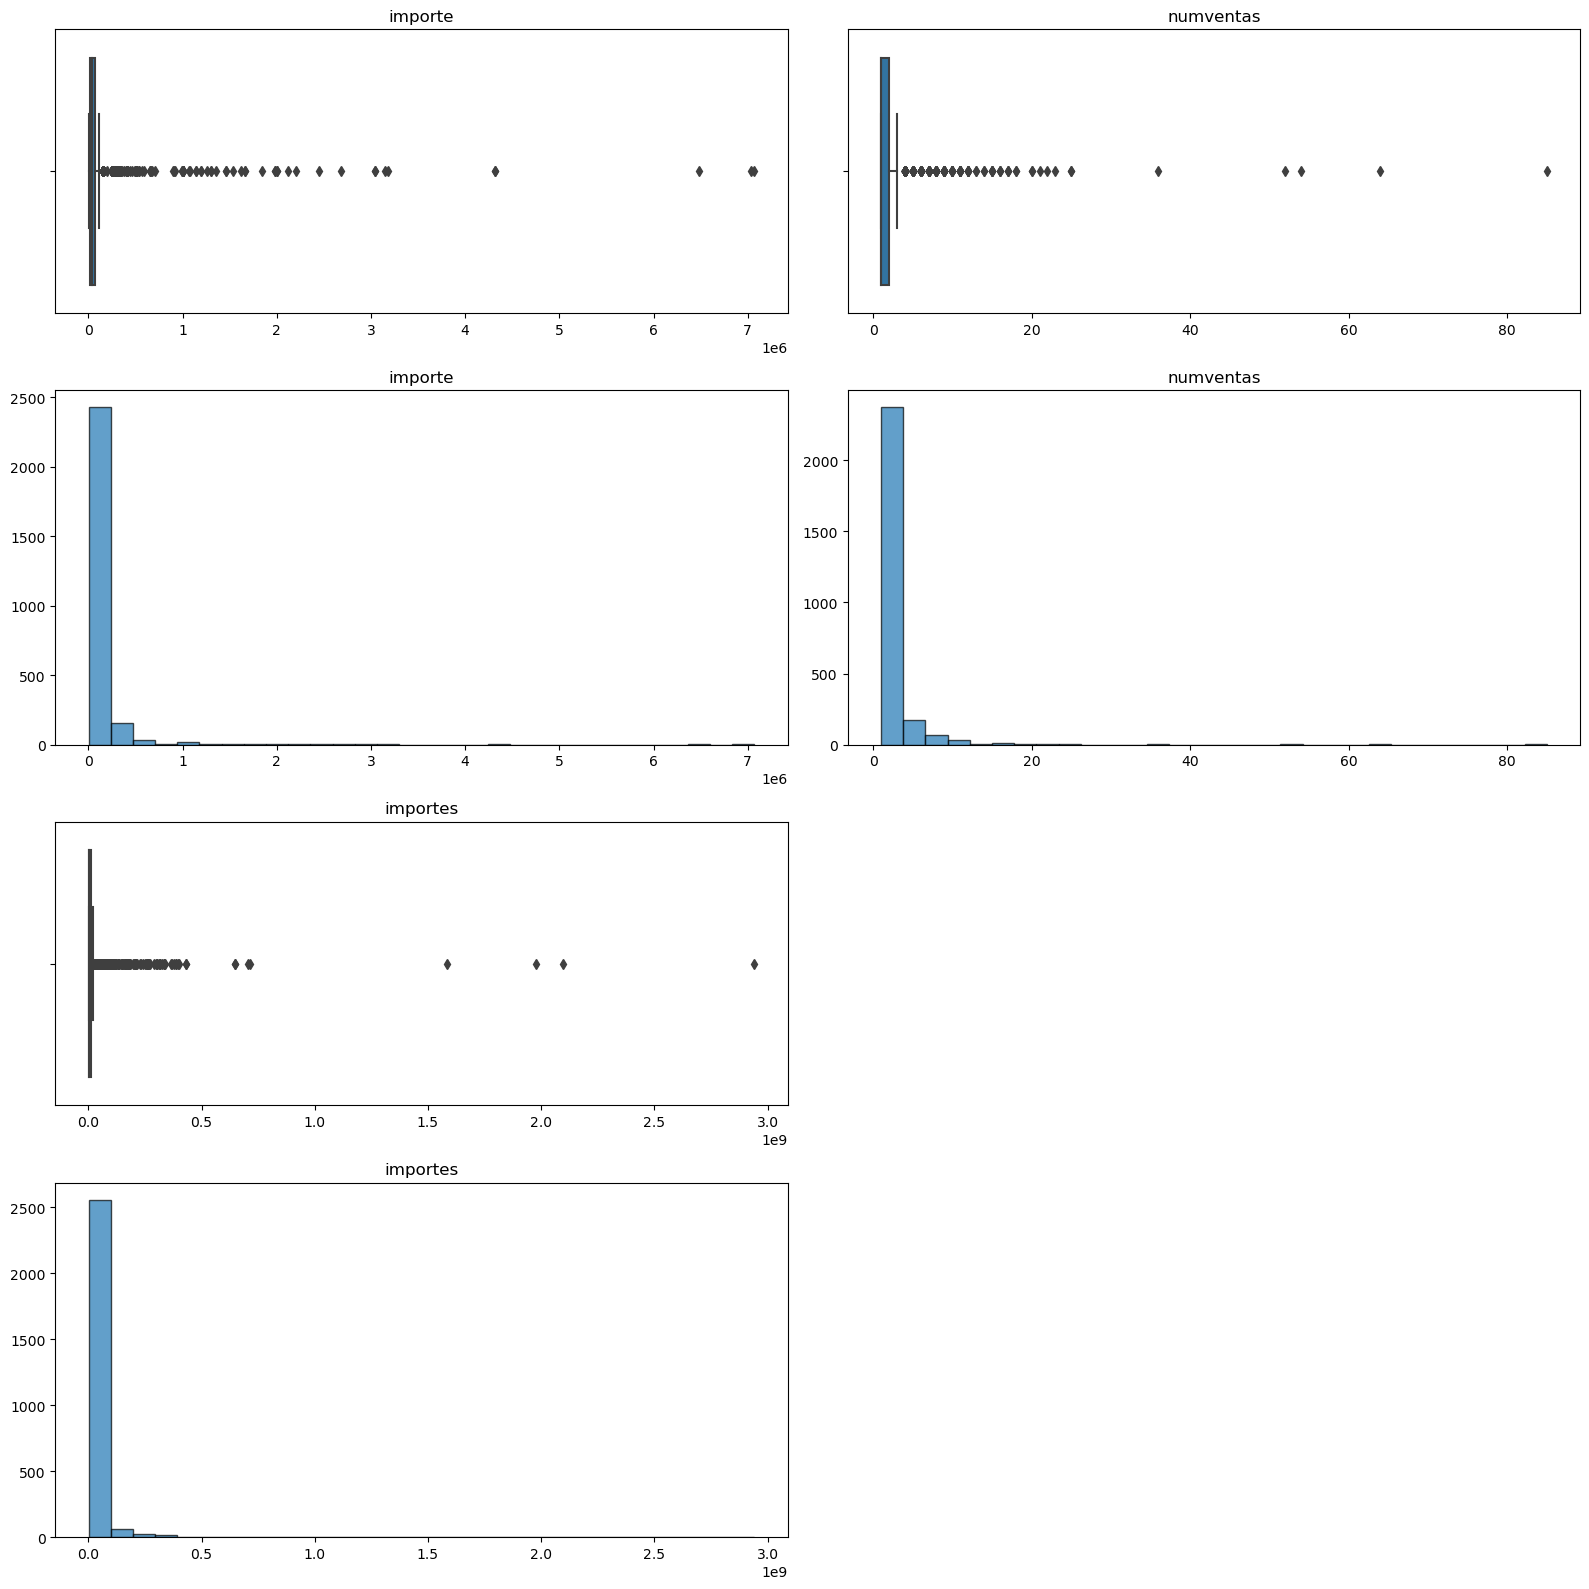

In [71]:
etl.plot_boxplot_and_hist(ventas_df.select_dtypes(include=['float', 'int']))

In [72]:
ventas_df.select_dtypes(include=['object']).describe(include='all').fillna(0).T  

,count,unique,top,freq
idventa,2669,2669,4006919000,1
tipoventa,2669,4,VP Informe,2350


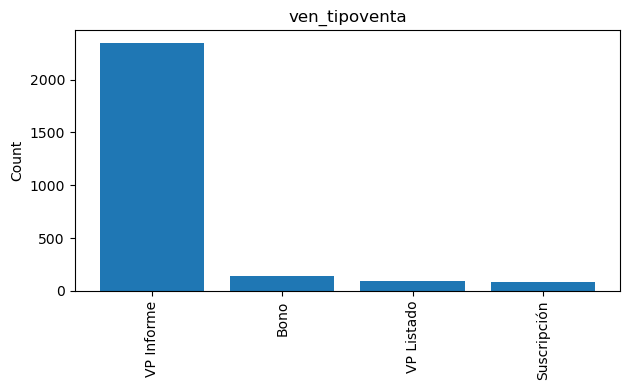

In [78]:
etl.plot_categorical_bars(ventas_df[['tipoventa']])

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> En las variables numéricas del dataframe ventas se observa lo siguiente:

    
En los atributos <strong>importe, numventas, importes</strong>, se aprecia una distribución con un sesgo a la derecha y la presencia de valores atípicos.
El valor promedio de importe de un producto es <strong>942.200</strong>, el valor promedio de importes por consumo de productos es <strong>20.606.847</strong> y el numero de ventas promedio es <strong>2.05</strong>.
    
En cuanto a la variable categórica <strong>tipoventa</strong>, se aprecia que el producto más frecuentemente vendido es <strong>VP informe</strong>. 

</div>

# 4 Creación de dataframe de estudio

Realizado el análisis preliminar se procede a concatenar y guardar el dataframe resultante. Con el proposito de identificar fácilmente a que dataframe pertenece cada atributo, se adiciona un prefijo a cada columna.

In [74]:
consumos_df3_inpute.columns = [f'cons_{col}' for col in consumos_df3_inpute.columns]
empresas_df_impute.columns = [f'emp_{col}' for col in empresas_df_impute.columns]
primer_consumo_df_impute.columns = [f'pcons_{col}' for col in primer_consumo_df_impute.columns]
sesiones_df2.columns = [f'ses_{col}' for col in sesiones_df2.columns]
usuarios_df_impute.columns = [f'usu_{col}' for col in usuarios_df_impute.columns]
ventas_df.columns = [f'ven_{col}' for col in ventas_df.columns]

In [75]:
consumos_df3_inpute.to_pickle('data//consumos.pkl')
empresas_df_impute.to_pickle('data//empresas.pkl')
primer_consumo_df_impute.to_pickle('data//primer_consumo.pkl')
sesiones_df2.to_pickle('data//sesiones.pkl')
usuarios_df_impute.to_pickle('data//usuarios.pkl')
ventas_df.to_pickle('data//ventas.pkl')

In [76]:
data_set = pd.concat([consumos_df3_inpute, primer_consumo_df_impute, 
                      sesiones_df2, usuarios_df_impute, ventas_df], axis=1)

A partir del dataframe que contiene la información conjunta se procede a eliminar algunos atributos que no son de interés.

In [40]:
data_set.drop(['cons_empconsul_id_mas_freq', 'cons_empconsul_id_mas_freq_total',
               'pcons_idconsumo', 'pcons_idproducto',
               'pcons_empconsul_id', 'ven_fechaventa', 'ven_idventa', 'usu_days_reg_cli'], axis=1, inplace=True)

La operación de concatenación, necesaria para obtener el conjunto de datos que integra las diversos dataframes, genera valores nulos. En la siguiente sección se identifican que atributos fueron afectados.

In [41]:
100*data_set.select_dtypes(include=['int', 'float']).isna().mean()

cons_descproducto_mas_freq_total            0.018916
cons_empconsul_sector_mas_freq_total        0.018916
cons_empconsul_prov_desc_mas_freq_total     0.018916
cons_total_consumos                         0.018916
cons_total_usuarios                         0.018916
pcons_numconsumos                           0.018916
pcons_numusuarios                           0.018916
ses_dias_max_entre_sesion                   0.000000
ses_dias_min_entre_sesion                   0.000000
ses_fechas_total_sesion                     0.000000
ses_total_sesiones                          0.000000
ven_importe                                98.130114
ven_numventas                              98.130114
ven_importes                               98.130114
dtype: float64

In [42]:
100*data_set.select_dtypes(include=['object']).isna().mean()

cons_descproducto_mas_freq            0.018916
cons_empconsul_sector_mas_freq        0.018916
cons_empconsul_prov_desc_mas_freq     0.018916
pcons_descproducto                    0.018916
pcons_empconsul_sector                0.018916
pcons_empconsul_descsector            0.018916
pcons_empconsul_prov_desc             0.018916
usu_tipousuario                       0.000000
usu_canal_registro                    0.000000
usu_ind_cliente                       0.000000
usu_bondad_email                      0.000000
ven_tipoventa                        98.130114
dtype: float64

In [43]:
100*data_set.select_dtypes(include=['datetime']).isna().mean()

cons_fecha_primera_consulta     0.018916
cons_fecha_ultima_consulta      0.018916
pcons_fechaconsumo              0.018916
ses_fecha_fin_sesion            0.000000
ses_fecha_inicio_sesion         0.000000
usu_fec_registro                0.000000
usu_fec_cliente                98.172150
dtype: float64

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> Se aprecia que algunos atributos tienen un porcentaje menor al <strong>1%</strong> de valores nulos, que en relación con el tamaño total del conjunto de datos en relativamente bajo. Para los atributos numéricos y categóricos que cumplen esta condición se aplicará un método de imputación basado en random forest y estadístico, respectivamante. En relación a los atributos de tipo datetime no realizará ninguna acción.

En cuanto a los atributos que tienen un porcentaje de valores nulos del <strong>98.13%</strong> (en gran medida hacen parte de dataframe ventas), se hace inviable alguna técnica de imputación. Sin embargo, dado que este dataframe contine información relevante sobre la venta de productos ofrecidos por el e-commerce, es necesario mantenerla. En este sentido, para los atributos de tipo numérico se reemplazará con el valor -1, para los categóricos como <strong>no_venta</strong> y sobre los atributos de tipo datetime no se realizará ninguna acción.
</div>

In [45]:
cols_num_impute = ['cons_descproducto_mas_freq_total', 'cons_empconsul_sector_mas_freq_total',
                   'cons_empconsul_prov_desc_mas_freq_total', 'cons_total_consumos',
                   'cons_total_usuarios','pcons_numconsumos', 'pcons_numusuarios']

cols_cat_impute = ['cons_descproducto_mas_freq', 'cons_empconsul_sector_mas_freq',
                   'cons_empconsul_prov_desc_mas_freq', 'pcons_descproducto',
                   'pcons_empconsul_sector', 'pcons_empconsul_descsector',
                   'pcons_empconsul_prov_desc']

In [46]:
data_set = etl.impute_num_pred(data_set, cols_num_impute, n_estimators=10)
data_set = etl.cols_impute(data_set, cols_cat_impute)

In [47]:
cols_num_impute = ['ven_importe', 'ven_numventas', 'ven_importes']
cols_cat_impute = ['ven_tipoventa']   

In [48]:
data_set = etl.cols_impute(data_set, cols_num_impute, mode='value', value=-1)
data_set = etl.cols_impute(data_set, cols_cat_impute, mode='value', value='no_venta')

In [52]:
data_set.shape[0]*data_set.shape[1]

4710288

In [50]:
data_type = pd.DataFrame(data_set.dtypes, columns=['tipo dato'])
data_type['count'] = 1
data_type.groupby('tipo dato').count()

,count
tipo dato,
datetime64[ns],7
int32,4
float64,10
object,12


In [51]:
data_set.to_pickle('data//data_set_1.pkl')

# 5. Conclusiones


<div class="alert alert-block alert-info">
    En las secciones anteriores se realizó la primera fase del desarrollo del componente experimental del TFM. 

En primer lugar se realizó la verificación y transformación del tipo de datos en cada atributo de los dataframes, acorde a la información suministrada por el director del trabajo de fin de máster y un análisis de detallado de cada dataframe.  Esta primera operación permitió la identificación adecuada del tipo de datos y la aplicación la técnica más adecuada para la imputación de valores nulos. 
Así mismo sobre los dataframe sesiones y consumos se aplicó una operación de agregación/agrupación de datos.  Esto dio lugar a la creación de nuevos atributos que pueden ser relevantes en la creación y modelos predictivos (ver sección 1.3 de este notebook). Aunque no se debió incluir en esta fase exploratoria, fue necesario realizarla dado que las claves/id_usuario estaban repetidas y esto puede ocasionar ambigüedades en las etapas de imputación, análisis exploratorio y creación del conjunto de datos final.

También se realizó un estudio fundamentado en estadística descriptiva y procesamiento de valores nulos, aplicando diferentes técnicas de imputación basadas en modelos de machine learning (random forest) para atributos de tipos numéricos y basadas en técnicas estadísticas descriptiva para atributos categóricos. En general se observó que los dataframe consumos, empresas y primer consumo, presentaron un porcentaje menor al 1% de valores nulos. Por otro lado, en algunos atributos de los dataframe usuarios y ventas presentaron un porcentaje significativamente alto de valores nulos ( > 80%).

Posteriormente, se realiza un análisis exploratorio de datos univariado basado en estadística descriptiva, gráficos de barras y cajas, donde se determinó que la gran mayoría de los atributos numéricos tiene distribuciones frecuenciales sesgadas a la derecha. Respecto a los atributos categóricos se observó que los valores más frecuentes está en torno 2 y 4 clases. Finalmente, en la variable target/id_venta, que hace referencia a si un usuario se convirte en cliente, se observo un sesgo alto. En términos  porcentuales solo 1.83% de usuarios se convierte en cliente y 98.17% no lo hacen.
</div>


# Información de sesión

In [54]:
import session_info
session_info.show()